In [1]:
# Initial imports and notebook setup, click arrow to show
from HARK.ConsumptionSaving.ConsRepAgentModel import RepAgentConsumerType, RepAgentMarkovConsumerType
from HARK.ConsumptionSaving.ConsIndShockModel import init_idiosyncratic_shocks
from copy import deepcopy
from HARK.utilities import plotFuncs
from time import process_time
import numpy as np

This module contains models for solving representative agent (RA) macroeconomic models. This stands in contrast to all other model modules in HARK, which (unsurprisingly) take a heterogeneous agents approach.  
In RA models, all attributes are either time invariant or exist on a short cycle. Also, models must be infinite horizon.

### Representative Agent

In this model, the agent has inelastic labor supply. 

The one period problem for this model is solved by the function $\texttt{solveConsRepAgent}$. The class $\texttt{RepAgentConsumerType}$ extends $\texttt{IndShockConsumerType}$ to represents agents in this model.


In [2]:
# Make a quick example dictionary
RA_params = deepcopy(init_idiosyncratic_shocks)
RA_params['DeprFac'] = 0.05
RA_params['CapShare'] = 0.36
RA_params['UnempPrb'] = 0.0
RA_params['LivPrb'] = [1.0]

In [3]:
# Make and solve a rep agent model, and plot the consumption function
RAexample = RepAgentConsumerType(**RA_params)
RAexample.solve()

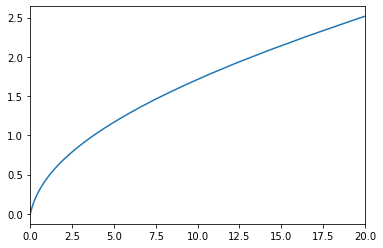

In [4]:
# Plot consumption function of a RA
plotFuncs(RAexample.solution[0].cFunc,0,20)

In [5]:
# Simulate the representative agent model
RAexample.T_sim = 2000
RAexample.track_vars = ['cNrmNow','mNrmNow','Rfree','wRte']
RAexample.initializeSim()
t_start = process_time()
RAexample.simulate()
t_end = process_time()
print('Simulating a representative agent for ' + str(RAexample.T_sim) + ' periods took ' + str(t_end-t_start) + ' seconds.')

Simulating a representative agent for 2000 periods took 1.641688 seconds.


### Markov Representative Agent

In this model, the agent experiences inelastic labor supply as well as a discrete Markov state.

The one period problem for this model is solved by the function $\texttt{solveConsRepAgentMarkov}$. The class $\texttt{RepAgentMarkovConsumerType}$ extends $\texttt{RepAgentConsumerType}$ to represents agents in this model.


In [6]:
# Make and solve a Markov representative agent
RA_markov_params = deepcopy(RA_params)
RA_markov_params['PermGroFac'] = [[0.97,1.03]]
RA_markov_params['MrkvArray'] = np.array([[0.99,0.01],[0.01,0.99]])
RA_markov_params['MrkvNow'] = 0
RAmarkovExample = RepAgentMarkovConsumerType(**RA_markov_params)
RAmarkovExample.IncomeDstn[0] = 2*[RAmarkovExample.IncomeDstn[0]]
RAmarkovExample.solve()

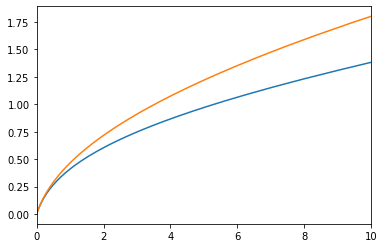

In [7]:
# Plot consumption function of a Markov RA
plotFuncs(RAmarkovExample.solution[0].cFunc,0,10)

In [8]:
# Simulate the two state representative agent model
RAmarkovExample.T_sim = 2000
RAmarkovExample.track_vars = ['cNrmNow','mNrmNow','Rfree','wRte','MrkvNow']
RAmarkovExample.initializeSim()
t_start = process_time()
RAmarkovExample.simulate()
t_end = process_time()
print('Simulating a two state representative agent for ' + str(RAexample.T_sim) + ' periods took ' + str(t_end-t_start) + ' seconds.')

Simulating a two state representative agent for 2000 periods took 2.0983539999999996 seconds.
